In [9]:
import json
import pandas as pd

# Load movies data
with open('movies.json', 'r') as file:
    movies_data = json.load(file)

# Convert movies data to a DataFrame
movies_df = pd.DataFrame(movies_data)

# Load reviews data
with open('reviews.json', 'r') as file:
    reviews_data = json.load(file)

# Convert reviews data to a DataFrame
reviews_df = pd.DataFrame(reviews_data)

# Merge the two DataFrames on 'item_id'
combined_df = pd.merge(reviews_df, movies_df, how='left', left_on='item_id', right_on='item_id')

# Display the first few rows of the combined dataset
print(combined_df.head())


   user_id  item_id  rating     timestamp                            title
0        0       50       5  881250949000                 Star Wars (1977)
1        0      172       5  881250949000  Empire Strikes Back, The (1980)
2        0      133       1  881250949000        Gone with the Wind (1939)
3      196      242       3  881250949000                     Kolya (1996)
4      186      302       3  891717742000         L.A. Confidential (1997)


In [10]:
# Convert the combined DataFrame into a user-item matrix
user_item_matrix = combined_df.pivot_table(index='user_id', columns='title', values='rating').fillna(0)


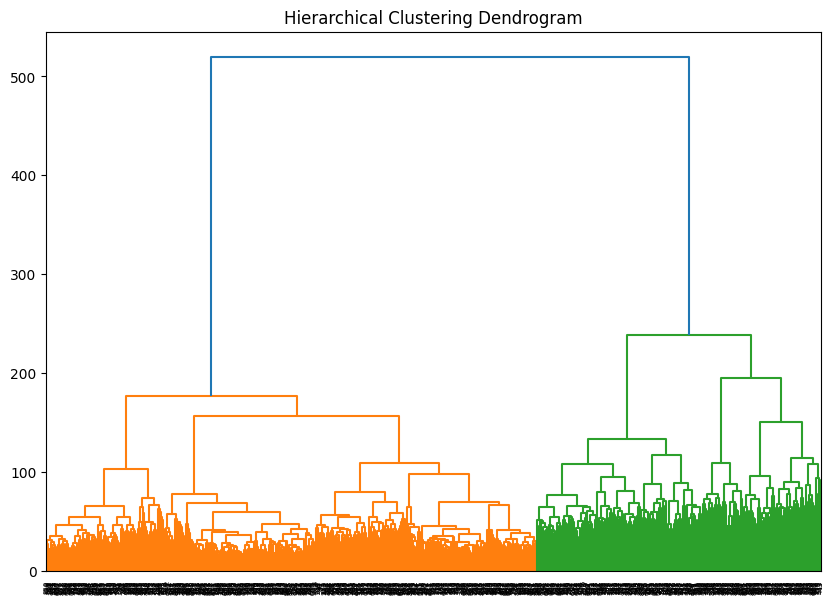

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import pandas as pd

# Assuming the user_movie_ratings matrix is already created

# Using linkage for hierarchical clustering
# 'ward' linkage minimizes the variance of the clusters being merged
Z = linkage(user_item_matrix, method='ward')

# Plotting the dendrogram (Optional, might be intensive for large datasets)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z)
plt.show()


In [12]:
from scipy.cluster.hierarchy import fcluster

# Define the number of clusters
num_clusters = 10

# Extract cluster labels
clusters = fcluster(Z, num_clusters, criterion='maxclust')
user_item_matrix['cluster'] = clusters


In [13]:
# Identify user 186's cluster
user_186_cluster = user_item_matrix.loc[186, 'cluster']

# Movies rated by user 186
rated_movies_by_186 = combined_df[combined_df['user_id'] == 186]['title'].tolist()

# Recommend a movie not watched by user 186 with the highest mean rating in the cluster
# Filter the user-item matrix to include only users in the same cluster as user 186
movies_in_cluster = user_item_matrix[user_item_matrix['cluster'] == user_186_cluster]

# Calculate the mean rating for each movie in the cluster
mean_ratings = movies_in_cluster.drop(columns='cluster').mean()

# Exclude the movies already watched by user 186
unwatched_movies = mean_ratings.drop(index=rated_movies_by_186, errors='ignore')

# Identify the highest rated unwatched movie
recommended_movie = unwatched_movies.idxmax()

print(f"Recommended Movie for user 186: {recommended_movie}")


Recommended Movie for user 186: Star Wars (1977)
